In [1403]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.interpolation import shift
from scipy.stats import t, shapiro, gaussian_kde
from scipy.optimize import minimize, fsolve
import pandas as pd
from scipy.stats import norm
import math

C:\Users\11692\AppData\Local\Temp\ipykernel_26100\639291304.py:5: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [1404]:
# Problem 1

In [1405]:
# Initialize parameters
sigma = 0.2  # Standard deviation of returns
price_prev = 100  # Initial price
n_samples = 10000  # Number of samples

#Assume mean = 0

# Generate random returns
r_t = np.random.normal(0, sigma, n_samples)

# Classical Brownian Motion
price_brownian = price_prev + r_t
mean_brownian = np.mean(price_brownian)
std_brownian = np.std(price_brownian)
theoretically_value_Class = price_prev
theoretically_std_Class = sigma

# Arithmetic Return System
price_arithmetic = price_prev * (1 + r_t)
mean_arithmetic = np.mean(price_arithmetic)
std_arithmetic = np.std(price_arithmetic)
theoretically_value_Arith = price_prev
theoretically_std_Arith = sigma * price_prev

# Geometric Brownian Motion
price_geo_brownian = price_prev * np.exp(r_t)
mean_geo_brownian = np.mean(price_geo_brownian)
std_geo_brownian = np.std(price_geo_brownian)
theoretically_value_Geo = price_prev * np.exp(0.5*sigma**2)
theoretically_std_Geo = price_prev * np.sqrt((np.exp(sigma**2)-1)*np.exp(sigma**2))

# Display the statistics
print(f"Classical Brownian Motion: Mean = {mean_brownian}, Std Dev = {std_brownian}, theoretically_value = {theoretically_value_Class}, theoretically_std = {theoretically_std_Class}")
print(f"Arithmetic Return System: Mean = {mean_arithmetic}, Std Dev = {std_arithmetic}, theoretically_value = {theoretically_value_Arith}, theoretically_std = {theoretically_std_Arith}")
print(f"Log Return (Geometric Brownian Motion): Mean = {mean_geo_brownian}, Std Dev = {std_geo_brownian}, theoretically_value = {theoretically_value_Geo}, theoretically_std = {theoretically_std_Geo}")

Classical Brownian Motion: Mean = 100.00338446897294, Std Dev = 0.20131939008085775, theoretically_value = 100, theoretically_std = 0.2
Arithmetic Return System: Mean = 100.33844689729368, Std Dev = 20.131939008085773, theoretically_value = 100, theoretically_std = 20.0
Log Return (Geometric Brownian Motion): Mean = 102.39473456249901, Std Dev = 20.853659966060313, theoretically_value = 102.02013400267558, theoretically_std = 20.609777651049587


c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

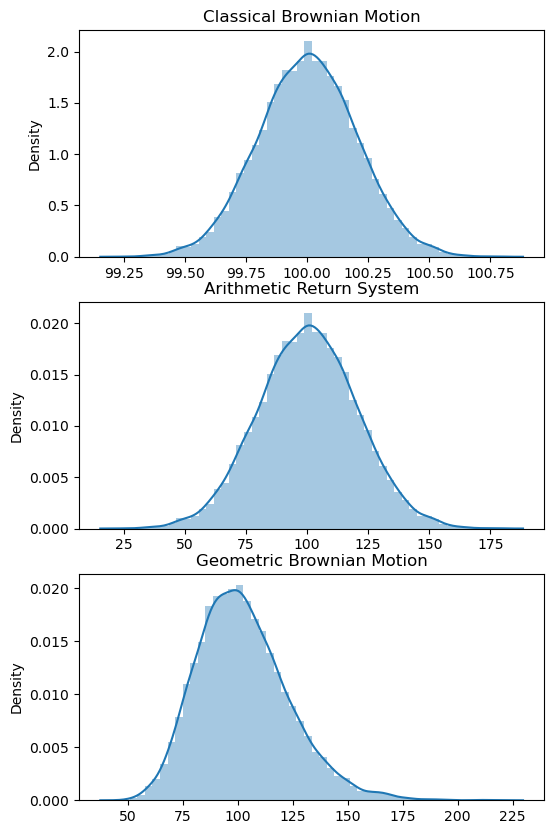

In [1406]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))
sns.distplot(price_brownian, ax=axes[0])
sns.distplot(price_arithmetic, ax=axes[1])
sns.distplot(price_geo_brownian, ax=axes[2])
axes[0].set_title("Classical Brownian Motion")
axes[1].set_title("Arithmetic Return System")
axes[2].set_title("Geometric Brownian Motion")
plt.show()

In [1407]:
# Problem 2

In [1408]:
#Implement a function similar to the “return_calculate()” in this week’s code
def return_calculate(arr, method="DISCRETE", date_column=None):
    n, m = arr.shape
    p2 = np.empty((n - 1, m), dtype=np.float64)

    # Loop through rows and columns to fill p2
    for i in range(n - 1):
        for j in range(m):
            p2[i, j] = arr[i + 1, j] / arr[i, j]

    if method.upper() == "DISCRETE":
        p2 -= 1.0
    elif method.upper() == "LOG":
        p2 = np.log(p2)
    else:
        raise ValueError(f"method: {method} must be in ('LOG', 'DISCRETE')")

    # Create DataFrame
    columns = [f'var_{i+1}' for i in range(m)]
    out = pd.DataFrame(p2, columns=columns)
    
    # Add date column if provided
    if date_column is not None:
        out[date_column] = date_column[1:]

    return out

In [1409]:
# Read data
daily_prices = np.genfromtxt('DailyPrices.csv', delimiter=',')
daily_prices = np.delete(daily_prices, 0, 0)
daily_prices = np.delete(daily_prices, 0, 1)
# Calculate return
daily_return = return_calculate(daily_prices)
# Remove the mean from the series so that the mean(INTC)=0
daily_return -= daily_return.mean()
daily_return

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101
0,-0.010992,-0.014177,-0.017632,-0.002763,-0.025527,-0.018099,-0.025331,-0.017797,-0.017836,-0.033266,...,-0.001401,-0.012419,0.030937,-0.011172,-0.018637,-0.006037,-0.015836,0.002191,-0.013291,-0.024982
1,-0.004221,-0.008781,-0.011940,-0.011317,-0.018055,-0.010519,0.015325,-0.011924,-0.004872,-0.013890,...,-0.004862,0.006623,-0.016289,-0.000172,0.002453,-0.009821,-0.001483,-0.012350,-0.003810,0.014647
2,0.017517,0.008688,0.018146,0.026385,0.014076,0.023841,0.033561,0.027030,0.015107,0.008882,...,0.016431,0.018469,-0.010200,0.037793,0.019336,0.010477,0.022107,0.008847,0.025901,0.022302
3,0.006088,-0.010184,0.000700,0.002288,0.015407,-0.010652,0.019343,-0.010477,0.007202,0.007625,...,0.002228,0.012119,0.027781,0.015137,0.019688,0.014773,-0.012499,0.026460,0.028808,0.009735
4,0.015087,0.018274,0.022011,0.026238,0.023659,0.020069,0.035767,0.020686,0.007594,0.040962,...,0.007106,0.015418,0.036603,-0.004923,0.019468,0.024658,0.036130,0.015775,0.004292,0.001067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0.000138,0.016347,-0.004479,-0.003258,-0.003215,0.005019,-0.033456,0.003890,0.006004,0.004672,...,0.007265,0.005112,0.008229,0.012374,-0.005579,0.018324,-0.003920,-0.001294,0.000797,-0.002014
261,-0.002522,0.005615,-0.002212,-0.017126,-0.014863,-0.002106,0.004343,-0.001818,-0.000847,0.005542,...,-0.002674,-0.015469,-0.014914,0.012845,-0.001642,-0.018320,0.012378,0.001283,-0.000527,-0.010715
262,-0.009641,-0.020558,-0.024943,-0.017340,-0.034154,-0.032026,-0.014927,-0.031423,-0.010861,-0.020488,...,0.009230,-0.008811,-0.012761,0.000801,-0.017757,-0.011863,-0.003339,-0.008559,0.019084,0.001654
263,-0.016976,-0.009455,-0.004831,-0.044391,-0.033650,-0.025551,-0.026494,-0.024881,-0.010632,-0.015935,...,0.011995,-0.020461,-0.018394,-0.002776,-0.011042,-0.015488,-0.027316,-0.013603,-0.003496,-0.044228


In [1410]:
#select data for META
META = daily_return.iloc[:,9]
META

0     -0.033266
1     -0.013890
2      0.008882
3      0.007625
4      0.040962
         ...   
260    0.004672
261    0.005542
262   -0.020488
263   -0.015935
264    0.008541
Name: var_10, Length: 265, dtype: float64

In [1411]:
#calculate VaR
def calculate_var(data, mean=0, alpha=0.05):
    return mean - np.quantile(data, alpha)

In [1412]:
# VaR: normal distribution
sigma = np.std(META)
simulation_norm = np.random.normal(0, sigma, 10000)
var_norm = calculate_var(simulation_norm)
print(var_norm)

0.05397674052101501


In [1413]:
# VaR: normal distribution with an Exponentially Weighted variance

# calculate exponential weights
def calculate_exponential_weights(lags, lamb):
    weights = []
    for i in range(1, lags + 1):
        weight = (1 - lamb) * lamb ** (i - 1)
        weights.append(weight)
    weights = np.array(weights)
    weights = np.flip(weights)
    normalized_weights = weights / weights.sum()
    return normalized_weights

# calculate exponentially weighted covariance matrix
def calculate_ewcov(data, lamb):
    weights = calculate_exponential_weights(data.shape[1], lamb)
    error_matrix = data - data.mean(axis=1)
    ewcov = error_matrix @ np.diag(weights) @ error_matrix.T
    return ewcov

In [1414]:
ew_cov = calculate_ewcov(np.matrix(META), 0.94)
ew_variance = ew_cov[0, 0]
sigma = np.sqrt(ew_variance)
simulation_ew = np.random.normal(0, sigma, 10000)
var_ew = calculate_var(simulation_ew)
print(var_ew)

0.029716076625116054


In [1415]:
# VaR: MLE fitted T distribution.
result = t.fit(META, method="MLE")
df = result[0]
loc = result[1]
scale = result[2]

simulation_t = t(df, loc, scale).rvs(10000)
var_t = calculate_var(simulation_t)
print(var_t)

0.04283169092375947


In [1416]:
# VAR: Using a fitted AR(1) model.
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(META, order=(1,0,0))
res = model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 var_10   No. Observations:                  265
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 528.712
Date:                Sun, 01 Oct 2023   AIC                          -1051.423
Time:                        02:30:49   BIC                          -1040.684
Sample:                             0   HQIC                         -1047.108
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.14e-06      0.002     -0.001      1.000      -0.004       0.004
ar.L1          0.0461      0.081      0.569      0.569      -0.113       0.205
sigma2         0.0011   4.17e-05     25.987      0.0

In [1417]:
sigma = np.sqrt(0.0011)
simulation_ar = np.random.normal(0, sigma, 1000)
var_ar = calculate_var(simulation_ar)
print(var_ar)

0.05352364923614595


In [1418]:
# VaR: historic
var_hist = calculate_var(META)
print(var_hist)

0.03948424995533789


In [1419]:
print(f'Normal distribution: {var_norm}')
print(f'Normal distribution(with ewv): {var_ew}')
print(f'T distribution: {var_t}')
print(f'AR(1) model: {var_ar}')
print(f'Historic Simulation: {var_hist}')

Normal distribution: 0.05397674052101501
Normal distribution(with ewv): 0.029716076625116054
T distribution: 0.04283169092375947
AR(1) model: 0.05352364923614595
Historic Simulation: 0.03948424995533789


c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\11692\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

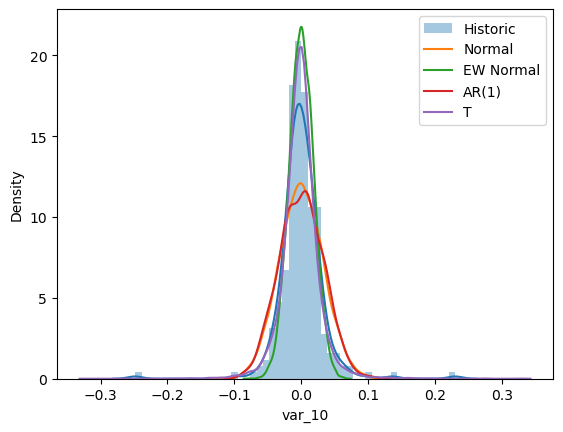

In [1420]:
plt.figure()
sns.distplot(META, label='Historic')
sns.distplot(simulation_norm, hist=False, label='Normal')
sns.distplot(simulation_ew, hist=False, label='EW Normal')
sns.distplot(simulation_ar, hist=False, label='AR(1)')
sns.distplot(simulation_t, hist=False, label='T')
plt.legend()
plt.show()

In [1421]:
#Question 3

In [1422]:
# rewrite the return calculation function for pandas
def pd_return_calculate(series, method="arithmetic"):
    price_change_percent = ((series.shift(-1) - series) / series)
    if method == "arithmetic":
        return price_change_percent
    elif method == "log":
        return np.log(price_change_percent)

In [1423]:
# load in data and calculate returns
prices = pd.read_csv("DailyPrices.csv", parse_dates=[0], index_col=0)
portfolios = pd.read_csv("portfolio.csv")
returns = pd_return_calculate(prices).dropna()

# Combine the portfolios to get a total one and append it to the end for easier 
# calculation.
total_holdings = portfolios.groupby('Stock').sum('Holding')
total_holdings['Portfolio'] = 'Total'
total_holdings = total_holdings.reset_index()
#portfolios = portfolios.sort_values(by = 'Stock')
portfolios = portfolios.append(total_holdings)


C:\Users\11692\AppData\Local\Temp\ipykernel_26100\2524976822.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portfolios = portfolios.append(total_holdings)


In [1424]:
#Method 1
def shapiro_test(data, significance_level=0.05):
    statistic, p_value = shapiro(data)
    return int(p_value > significance_level)

# Check for normality of returns using the Shapiro-Wilks test
for idx, group in portfolios.groupby('Portfolio'):
    relevant_returns = returns[group.Stock]
    count_normal = relevant_returns.apply(shapiro_test).sum()
    percent_normal = (count_normal / relevant_returns.shape[1]) * 100
    print(f"{percent_normal}%")

9.090909090909092%
3.0303030303030303%
2.941176470588235%
5.0%


In [1425]:
# Initialize current_prices DataFrame
current_prices_df = pd.DataFrame({"Price": prices.iloc[-1]})

# Loop through each portfolio
for port_idx, port_group in portfolios.groupby('Portfolio'):
    # Set index and join with current_prices
    port_group.set_index('Stock', inplace=True)
    updated_port = port_group.join(current_prices_df.loc[port_group.index])

    # Calculate current portfolio values
    portfolio_current_values = updated_port['Holding'] * updated_port['Price']
    total_portfolio_value = portfolio_current_values.sum()

    # Simulate returns and prices
    simulated_returns = returns[updated_port.index]
    simulated_prices = (1 + simulated_returns) * updated_port['Price'].T
    simulated_values = simulated_prices @ updated_port['Holding']

    # Calculate historic Value at Risk (VaR)
    historic_value_at_risk = calculate_var(simulated_values, total_portfolio_value)
    
    print(f"Portfolio {port_idx}: {historic_value_at_risk}")

Portfolio A: 16987.478467068402
Portfolio B: 10980.358676761738
Portfolio C: 22143.33464394696
Portfolio Total: 47461.54180059675


In [1426]:
# Method 2 KDE

In [1427]:
# Calculate KDE VaR.
class KernelDensityEstimation:
    def __init__(self, dataset, significance=0.05):
        self.kde_obj = gaussian_kde(dataset)
        self.significance = significance

    def quantile(self, x_val):
        return self.kde_obj.integrate_box(0, x_val) - self.significance

    def compute_var(self, avg=0):
        return avg - fsolve(self.quantile, x0=avg)[0]

# Loop through each portfolio
for idx, port_group in portfolios.groupby('Portfolio'):
    # Update index and merge with current_prices
    port_group.set_index('Stock', inplace=True)
    updated_portfolio = port_group.join(current_prices_df.loc[port_group.index])

    # Compute current value of portfolio
    current_valuations = updated_portfolio['Holding'] * updated_portfolio['Price']
    total_value = current_valuations.sum()

    # Simulate portfolio returns and values
    simulated_rets = returns[updated_portfolio.index]
    simulated_price_points = (1 + simulated_rets) * updated_portfolio['Price'].T
    simulated_portfolio_vals = simulated_price_points @ updated_portfolio['Holding']

    # Compute Value at Risk (VaR) using KDE
    kde_instance = KernelDensityEstimation(simulated_portfolio_vals)
    kde_value_at_risk = kde_instance.compute_var(total_value)

    print(f"Portfolio {idx}: {kde_value_at_risk}")

Portfolio A: 18971.409620089922
Portfolio B: 11658.000403395738
Portfolio C: 24127.74499538215
Portfolio Total: 51558.929609780665
